In [1]:
# Part B - GenAI Assisted Neural Network
# Author: Sankar
# Coventry University - 7154CEM Coursework


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow.keras.backend as K
import itertools

In [3]:
# --- 1. Load CIFAR-10 Dataset ---
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
# --- 2. GenAI Suggested Model Architecture ---
def build_genai_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
model_genai = build_genai_model()
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model_genai.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# --- 3. Early Stopping ---
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
# --- 4. Train Model ---
history_genai = model_genai.fit(x_train, y_train,
                                epochs=30,
                                batch_size=64,
                                validation_data=(x_test, y_test),
                                callbacks=[early_stop])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.3541 - loss: 1.7403 - val_accuracy: 0.4477 - val_loss: 1.6178
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5512 - loss: 1.2364 - val_accuracy: 0.5372 - val_loss: 1.3332
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6258 - loss: 1.0622 - val_accuracy: 0.5735 - val_loss: 1.2782
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6576 - loss: 0.9721 - val_accuracy: 0.6908 - val_loss: 0.8701
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6847 - loss: 0.8925 - val_accuracy: 0.7042 - val_loss: 0.8281
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7068 - loss: 0.8447 - val_accuracy: 0.7293 - val_loss: 0.7686
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7269 - loss: 0.7903 - val_accuracy: 0.7605 - val_loss: 0.6739
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7410 - loss: 0.7515 - val_accurac

In [8]:
model_genai.save('partB_model.h5')

In [9]:
# --- 5. Evaluation ---
test_loss_genai, test_acc_genai = model_genai.evaluate(x_test, y_test)
print(f"GenAI Model Test Accuracy: {test_acc_genai:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8384 - loss: 0.4779
GenAI Model Test Accuracy: 0.8363


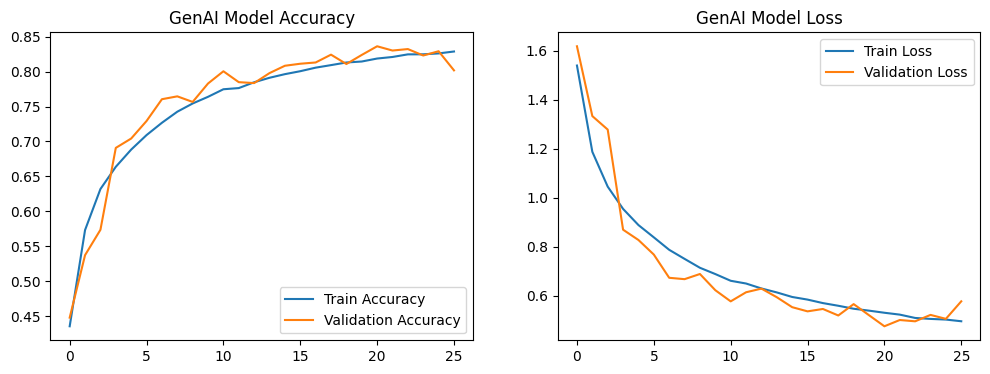

In [10]:
# --- 6. Accuracy & Loss Plots ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_genai.history['accuracy'], label='Train Accuracy')
plt.plot(history_genai.history['val_accuracy'], label='Validation Accuracy')
plt.title('GenAI Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_genai.history['loss'], label='Train Loss')
plt.plot(history_genai.history['val_loss'], label='Validation Loss')
plt.title('GenAI Model Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


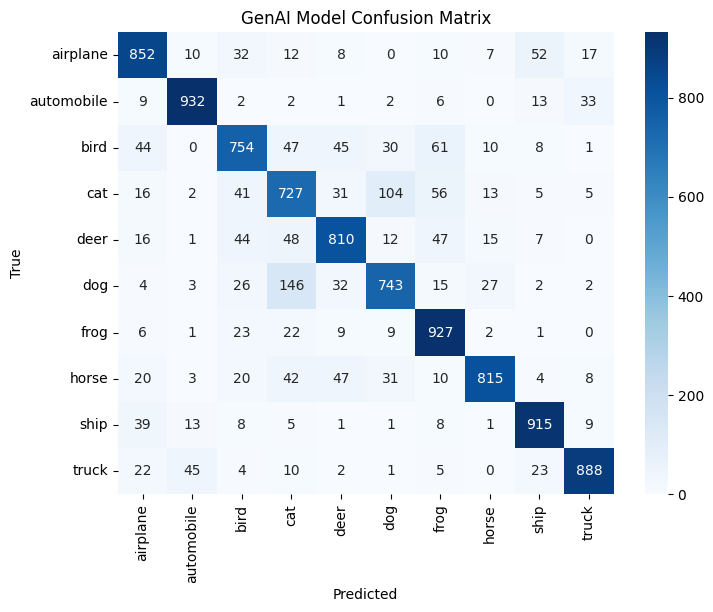

In [11]:
# --- 7. Confusion Matrix ---
y_pred_genai = np.argmax(model_genai.predict(x_test), axis=1)
cm_genai = confusion_matrix(y_test, y_pred_genai)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_genai, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("GenAI Model Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


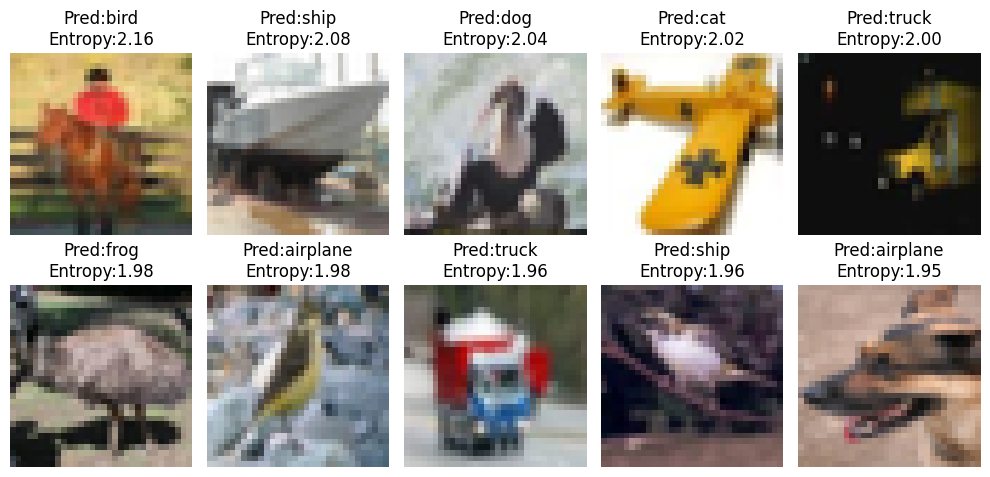

In [12]:
# --- 8. Ambiguity Detection using Prediction Entropy ---
def prediction_entropy(prob_dist):
    return -np.sum(prob_dist * np.log(prob_dist + 1e-8), axis=1)

y_probs_genai = model_genai.predict(x_test)
entropy = prediction_entropy(y_probs_genai)

ambiguous_indices_genai = np.argsort(-entropy)[:10]  # top 10 high entropy (uncertain)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(ambiguous_indices_genai):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred:{class_names[y_pred_genai[idx]]}\nEntropy:{entropy[idx]:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
# --- 9. Classification Report ---
print("GenAI Model Classification Report:")
print(classification_report(y_test, y_pred_genai, target_names=class_names))

GenAI Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84      1000
  automobile       0.92      0.93      0.93      1000
        bird       0.79      0.75      0.77      1000
         cat       0.69      0.73      0.71      1000
        deer       0.82      0.81      0.82      1000
         dog       0.80      0.74      0.77      1000
        frog       0.81      0.93      0.86      1000
       horse       0.92      0.81      0.86      1000
        ship       0.89      0.92      0.90      1000
       truck       0.92      0.89      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

